TH: Maybe an introduction cell with title, dates and authors (names, contact) 

<div class="row">
    <div class="column">
        <a href="https://ibb.co/ch3VMf3"><img src="https://i.ibb.co/RTbdZrb/desy.jpg" alt="desy" border="0" border-radius=4px width=150px></a>
    </div>
     <div class="column">
         <a href="https://ibb.co/d0rvWCH"><img src="https://i.ibb.co/bgPVWwG/iiser-pune.jpg" alt="iiser-pune" border="0" border-radius=4px width=150px></a>
    </div>
</div>

<h1 style="background-color:white;color:black;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Analysing transfer and telemetry data collected at dCache installations at DESY</h1>

<h1 style="background-color:white;color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Dipayan Pal, Indian Institute of Science Education and Research, Pune, India</h1>
<h1 style="background-color:white;color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Elisey Mankov, Saint Petersburg State University, Saint Petersburg, Russia</h1>

<h1 style="background-color:white;color:black;font-family:newtimeroman;font-size:140%;text-align:center;border-radius: 15px 50px;">Supervisors - Thomas Hartmann and Christian Voss</h1>

<h1 style="background-color:white;color:black;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;">Date</h1>

<h1 style="background-color:white;color:black;font-family:newtimeroman;font-size:180%;text-align:center;border-radius: 15px 50px;">Abstract</h1>

dCache is a system which is used to store and host large amounts of data. However, transfers between dCache and individual clients may fail due to various reasons, e.g. network disconnection. In this project, we tried building an Anamoly Detection Machine Learning Algorithm which would detect when the system has failed in its operations and thus raise an alarm informing the operators of the system failure and thus resulting in more quick fixes and more efficient working. We managed to build a very basic Machine Learning algorithm called the Logistic Regression to perform this task. We feel like our work will contribute to the establishment of a more complex Anamoly Detection algorithm and our project serves as a very basic first step towards that goal.

<a id="table"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">Table Of Content</h1>


* [1. Motivation](#1)
* [2. Introduction](#2)
    * [2.1. dCache](#2.1)
    * [2.2. Apache Spark](#2.2)
        * [2.2.1. Apache SparkContext](#2.2.1)    
        * [2.2.2. Spark RDD](#2.2.2)            
    * [2.3. Machine Learning](#2.3)    
    * [2.4. Logistic Regression](#2.4)       


* [3. Analysis](#3)
    * [3.1 Importing Libraries and setting up the Spark Configuratio](#3.1)
    * [3.2 Data Pre-Selection](#3.2)
    * [3.3 Feature Description](#3.3)
    * [3.4 Data Pre-Processing](#3.4)
    * [3.5 Data Sampling and Labeling](#3.5)
    * [3.6 Algorithm Selection](#3.6)
    * [3.7 The model evaluation](#3.7)


* [4. Results](#4)
* [5. Conclusions](#5)
* [6. Discussion](#6)
* [7. Acknowledgement](#7)
    * [7.1. Dipayan](#7.1)


* [8. References](#8)

<a name="1"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">1. Motivation</h1>

As in each system, breakdowns and errors sometimes occur in **dCahce**. Few people would dispute that it is important to detect them automatically and warn users afterward. Imagine the situation, a scientist from Japan failed to access data from the node placed in the mid-Europian region, and now that person is trying to figure out if there was a problem with her/his local machine or with the entire system, but she/he can not get any information, because due to the difference in time zones local office in Europe is closed already. In such cases, it is especially important to warn the user if something was wrong. That is why we decided to develop a **machine learning** model, helping to detect undesirable situations.
  
This report is devoted to our solution for this problem. We have prepared the model, analysing information about dCache transactions and  distinguishing `signal` - when the system works fine and `backgorund` - when something goes wrong. You can find a more detailed description on the following pages of the report.
 

<a name="2"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">2. Introduction</h1>
<a name="2.1"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">2.1. dCache</h1>

Built in Java, dCache is a distributed mass-storage system that allows us to manage huge ammount of scientific data. The data are distributed among the large number of heterogenous pools(nodes) that handle with data storage and transfer. A client can easily get access to dCache data through requests.For more information look here: [9].  
   
Information we are intersted in is about occurred in dCache transactions, acting on file operations on the cluster. These are contained in *billing* files which are a set of JSON dictionaries for a particular date. There are several main types of transactions: `request`, transfer, remove, store, restore, but  only `stores` will be in our sphere of interests (later will be explained why).

Since amount of data to process is huge, to avoid overloading our local machines we use an 
unified analytics engine for large-scale data processing - **Apache Spark** [6].
   

In [1]:
# links/references here to dCache and Spark 

#links are in square brackets

<a name="2.2"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">2.2. Apache Spark</h1>

**Apache Spark** is an open-source, distributed processing system used for big data workloads. It utilizes in-memory caching, and optimized query execution for fast analytic queries against data of any size. [1.]

Spark was introduced in 2012 and has gained a lot of popularity in the field of Big Data Analys=tics.

`imho a bit risky to explain a tool refering to another tool, that is not used later on. I would probably rephrase and try to explain Spark "stand-alone"`

Apache Spark works with the system to distribute data across the cluster and process the data in parallel. Spark uses master/slave architecture i.e. one central coordinator and many distributed workers. Here, the central coordinator is called the `driver`.

The driver runs in its own Java process. These drivers communicate with a potentially large number of distributed workers called `executors`. Each executor is a separate java process. A Spark Application is a combination of driver and its own executors.

`I would point especially out, that Spark is distributed over many nodes and thus can utilize the resources of all these machines in parallel`


<a name="2.2.1"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">2.2. Apache Spark</h1>

**SparkContext** is the heart of Spark Application. It establishes a connection to the Spark Execution environment. It is used to create `Spark RDDs`
, accumulators, and broadcast variables, access Spark services and run jobs. SparkContext is a client of Spark execution environment and acts as the master of Spark application.

<a name="2.2.2"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">2.2.2. Spark RDD</h1>

RDD (Resilient Distributed Dataset) is the fundamental data structure of Apache Spark which are an immutable collection of objects which computes on the different node of the cluster. Each and every dataset in Spark RDD is logically partitioned across many servers so that they can be computed on different nodes of the cluster.

<a name="2.3"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">2.3. Machine Learning</h1>

**Machine learning(ML)** is a subfield of artificial intelligence, which is broadly defined as the capability of a machine to imitate intelligent human behavior. Artificial intelligence systems are used to perform complex tasks in a way that is similar to how humans solve problems.  \[[2.](#RefML)\]

`named anchor links seem to work in markdown over the whole document`
`I placed in the bib section at the end a ' <a name="RefML"></a> ' block in the text and could refer to it here with a ' [2.](#RefML) ' link`

Broadly, there are mainly 3 types of ML algorithms:

* Supervised Learning: When an algorithm learns from example data and associated target responses that can consist of numeric values or string labels, such as classes or tags, in order to later predict the correct response when posed with new examples comes under the category of Supervised learning. It is used for basic ML work like prediiction of house prices etc.

* Unsupervised learning: When an algorithm learns from plain examples without any associated response, leaving to the algorithm to determine the data patterns on its own. It is used for tasks like Email spam filtering, Natural Language Processing etc.

* Reinforcement learning: Reinforcement Learning is a feedback-based Machine learning technique in which an agent learns to behave in an environment by performing the actions and seeing the results of actions. For each good action, the agent gets positive feedback, and for each bad action, the agent gets negative feedback or penalty. The agent learns automatically using feedbacks without any labeled data, unlike supervised learning. RL solves a specific type of problem where decision making is sequential, and the goal is long-term, such as game-playing, robotics, etc.

`not clear, what "decisions bear consequences" means here`

<a href="https://ibb.co/sH5Nv38"><img src="https://i.ibb.co/YZD17jH/figure01.png" alt="figure01" border="0"></a>

Source: [Link](https://developer.ibm.com/articles/cc-models-machine-learning/)

<a name="2.4"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">2.4. Logistic Regression</h1>

Logistic Reression is a type of Supervised Algorithm that is used for classification problems, i.e. correctly classifying various data points to their correct data labels. It calculates the probability of the datasample being a particular class. 

In our project, we have worked with binary class Logistic Regression Model which classifies 2 Labels 0 and 1.

The conditional probability that our Logistic model gives a particular class given the dataset is given by -

<a href="https://ibb.co/vXSL8Xr"><img src="https://i.ibb.co/XYqFTYd/1-I0l-W7-Ydv-Tn3m-HXh56p-Yx-ZQ.gif" alt="1-I0l-W7-Ydv-Tn3m-HXh56p-Yx-ZQ" border="0"></a>

where

* w = weight values which are determined by our ML algorithm

* x = data input

* y = conditional probability of predicting a particular class given the dataset

Plot of y with a one dimensional data input x will have the following form - 

<a href="https://ibb.co/sg1spY7"><img src="https://i.ibb.co/GdMCfSm/1-Un-SW1b5-Ldp-Fl-Bx5h-R54-J0w.png" alt="1-Un-SW1b5-Ldp-Fl-Bx5h-R54-J0w" border="0"></a>

`can you describe in short, what the example plot shows and why?`

Source: [Link](https://towardsdatascience.com/an-introduction-to-logistic-regression-8136ad65da2e)

If the y value for a particular instance is greater than the model's threshold, Logistic Regression predicts it as a positive instance (class 1), otherwise as a negative one (class 0). Default model's threshold equals 0.5.

<a name="3"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">3. Analysis</h1>
<a name="3.1"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">3.1. Importing Libraries and setting up the Spark Configuration</h1>
The following libraries and Spark Configurations were used:

In [2]:
#libraries for importing spark
import findspark
findspark.init()
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark_dist_explore import hist
from pyspark.sql.types import StructField, StructType, StringType
from pyspark.sql import Row


import os
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from datetime import datetime
import time
import re
from ipaddress import ip_address
from urllib.parse import urlparse
import json
import isodate
from dateutil import parser
from dateutil import tz
from urllib.request import urlopen

In [3]:
#setting up the spark context

sc_conf = SparkConf().setMaster('spark://dcache-dot1.desy.de:5000').set('spark.executor.memory',
'26G').set('spark.driver.memory','8G').set('spark.driver.maxResultSize','8G')
#sc = SparkContext(appName="PythonStreaming")
sc = SparkContext(conf = sc_conf)
sqlContext = SQLContext(sc)

<a name="3.2"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">3.2. Data Pre-Selection</h1>


As was said before, we were interested in only  `store` type of transactions. There are two main reasons for it. First - structure of messages with type `store` is not really complicated, there are not many features to analyze in comparison with `transfer`, for instance. Second - there are sufficient number of instances with message type `store` in dCache.

Two random days were chosen for analysis: 2021-07-10 and 2021-08-01. For converting data to RDD we wrote special function `convert_data`. As you may see, there are two parametrs in it: `file` - a file's directory, `msgType` - type of a message.

In [4]:
def convert_data(file, msgType):
    data = sc.textFile(file)
    billing = data.map(lambda row: json.loads(row)).filter(lambda row: row.get('msgType',None) == msgType)
    return billing

To combine data from both days SparkContext method *union()* was used:

In [5]:
billing_RDD = sc.union(
    [
        convert_data('/pnfs/desy.de/desy/dcache-operations/billing-archive/xfel/2021/07/billing-2021-07-10.json',"store"),
        convert_data('/pnfs/desy.de/desy/dcache-operations/billing-archive/xfel/2021/08/billing-2021-08-01.json',"store")
    ]
)

<a name="3.3"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">3.3. Feature Description</h1>

After selecting the msgType `Store`, we can see that the RDD has many columns of data. 

All the columns along with an example, can be seen using the following code.

In [6]:
billing_RDD.first()

{'transferTime': 23,
 'version': '1.0',
 'date': '2021-07-10T02:01:27.432+02:00',
 'cellDomain': 'dcache-xfel132-06Domain',
 'pnfsid': '00005F97A5611EE74DE68C4EFB82451E8ADD',
 'transaction': 'pool:dcache-xfel132-06@dcache-xfel132-06Domain:1625875287432-12713',
 'status': {'code': 66, 'msg': 'HSM script failed (script reported: 66: )'},
 'msgType': 'store',
 'fileSize': 9514620780,
 'billingPath': '/pnfs/desy.de/exfel/archive/XFEL/proc//SPB/201701/p002038/r0220/CORR-R0220-AGIPD04-S00003.h5',
 'storageInfo': 'xfel:SPB-201701PROC@osm2',
 'queuingTime': 0,
 '@version': '1',
 '@timestamp': '2021-07-10T00:01:27.457Z',
 'tags': ['xfel'],
 'cellType': 'pool',
 'session': 'pool:dcache-xfel132-06@dcache-xfel132-06Domain:1625875287432-12713',
 'cellName': 'dcache-xfel132-06'}

However, all this columns are not required for our ML analysis. So, we have selected few columns which we deemed important for our task of Anomaly Detection.

`which fields were considered important?`

All the other columns were rejected because they were unique label to each event and thus wouldn't provide much insight into the Anomaly Detection algorithm that we are trying to construct.

| Features     | Description                                                                             |
|--------------|-----------------------------------------------------------------------------------------|
| CellName     | contains information on which pool issued the request                                   |            
| date_time    | time at which the exact request was made                                                |
| fileSize     | actual stored size of a file for a single request                                       |
| queuingTime  | how long the request was queued by the tape system                                     |                          
| transferTime | time in ms it took for the transfer to finish                                           |
| status       | status of the transfer; 0 means successful request and non zero status means some error |


# table still incomplete

<a name="3.4"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">3.4. Data Pre-Processing</h1>

Before the data can be used for our ML purposes it has to be transformed so that they are suitable for applying our ML algorithm.

We use some wrapper functions to do some initial transformations and thus make our custom schema.

* `CellName` - Taking the last 4 numbers and converting it into a string.

* `date_time` - Converting the date into an unix epoch format, which is the number of seconds that have elapsed since January 1, 1970.

* `fileSize` `transferTime` - Took the log of numbers

* `queuingTime` - Took the log of numbers, taking care of the null or 0 cases and assigning them -10

* `initial label` - Assigned all non-zero status numbers as 1 and zero as 0

In [7]:
def cellName(cellName):
    s=cellName[len(cellName)-5:]
    s1=s.split('-')
    return str(s1[0])+str(s1[1])

def date_time(date):
    return int(time.mktime(parser.parse(date).timetuple()))

def fileSize(fileSize):
    return float(np.log(fileSize))

def queuingTime(queuingTime):
    if (queuingTime == 0) | (queuingTime is None):
        return -10.0
    else:    
        return float(np.log(queuingTime))
    
def transferTime(transferTime):
    return float(np.log(transferTime))

def initial_label(status):
    if status['code']!=0:
        return 1
    else:
        return 0

We then call our custom schema and apply it to our RDD `billing_RDD` to create a dataframe.

In [8]:
billing_Schema =  StructType([
    StructField('cellName', StringType(), True),
    StructField('date_time', LongType(), True),
    StructField('fileSize', FloatType(), True),
    StructField('transferTime', FloatType(), True),
    StructField('queuingTime', FloatType(), True),
    StructField('initial_label', LongType(), True)
   ])

def parse_billing(entry):
    parse_list = [ cellName(entry.get('cellName')),
                   date_time(entry.get('date')),
                   fileSize(entry.get('fileSize')),
                   transferTime(entry.get('transferTime')),
                   queuingTime(entry.get('queuingTime')),
                   initial_label(entry.get('status'))
                  ]
    info = tuple( field for field in parse_list )
    return info

billing_df = sqlContext.createDataFrame(billing_RDD.map(lambda s: parse_billing(s)), billing_Schema)
billing_df.createOrReplaceTempView("billing_desy") #name creation for sql quiries
billing_df.cache()

DataFrame[cellName: string, date_time: bigint, fileSize: float, transferTime: float, queuingTime: float, initial_label: bigint]

Below, we have printed our custom schema.

It also shows the datatypes for each column and provides us with the information that there is no null value in any of the columns.

In [9]:
billing_df.printSchema()

root
 |-- cellName: string (nullable = true)
 |-- date_time: long (nullable = true)
 |-- fileSize: float (nullable = true)
 |-- transferTime: float (nullable = true)
 |-- queuingTime: float (nullable = true)
 |-- initial_label: long (nullable = true)



We have one column `cellName` which has 'String' type. Since, a 'String' type column can't directly be used for any ML analysis, we have to convert it into a suitable form.

To perform machine learning and all necessary preprocessing steps we used special library `MLlib`. For more information look [10]. 

We use the `StringIndexer` module in Mllib followed by the `OneHotEncoder` module, which transforms the CellName columns into a sparse matrix which can then be used for ML analysis.

In [10]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
str_columns=['cellName']
string_indexer=[ StringIndexer(inputCol=x, outputCol=x+'_StringIndexer', handleInvalid='skip') for x in str_columns]
one_hot_encoder=[OneHotEncoder(inputCol=f"{x}_StringIndexer", outputCol=f"{x}_OneHotEncoder") for x in str_columns]

To be able to apply Logistic Regression on our data we have to convert the DataFrame into a single vector of features called 'features' which is achieved by the `Vectorizer` module in Mllib.

In [11]:
from pyspark.ml.feature import VectorAssembler
num_columns=['fileSize', 'transferTime', 'queuingTime']
assembler_input=num_columns+[f"{x}_OneHotEncoder" for x in str_columns]
vector_assembler=VectorAssembler(inputCols=assembler_input, outputCol='features')

Note, that `date_time` field was not included in the vector of features. That is because `date_time` is a unique feature for each file, which does not provide an ML model with important information. However, it plays a crucial role in data sampling (later will be shown how), that is why we did not exclude `date_time` from the list of fields. 

<a name="3.5"></a>

<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">3.5. Data Sampling and Labeling</h1>
Since, we had 2 classes to distinguish - `signal` and `background`, we had to use a classification model for our problem.

`would elaborate more, that you do a kind off supervised learning - but due to the constraints have to classify events more broadly (added more sentences below)`

Before starting to apply machine learning for classifictaion, it is essetial to prepare data samples and label instances correctly. 

First of all, we would like to describe labeling of the data instances. Ideally, each instance should be provided with its own label independently on other instances, however, it was not feasible for us, since approach with using `status_code` feature (look at the `initial_label` field, point 2.5) is a bit naive to make a decision if a particular instance is a part of `background` or `signal`. More sophisticated algrothim was required. So, we have developed the one, having decided that dividing all instances on one hour bins might be helpful. New labeling algorithm includes two steps:
* Using `date_time` field, we divide all available time (for two chosen dates) on a particular number of bins, each bin equals one hour of time. 
* Averaging values of the field `initial_label` for a particular bin, we compare output value with the threshold (threshold=0.5 in our case). If the averaged value is less than the threshold we consider all instances as signal (fill 0 as the `label` for each instance of the bin), otherwise as background (fill 1 as the the `label` for each instance of the bin).

The second issue is how to sample the data. We decided to apply two ways:
* Extracting first 70 % instances for each hour sequently (serial way) 
* Extracting  70 % instances for each hour randomly (random way)

We chose exactly these ways to see how the input data with the particular sequential structure, like in the serial way, might influence of the machine learning algorithm perfomance, and compare results with those for the random input data.  
`can you explain, why you consider both approaches? (explained above)`

`for the discussion --> how might the results develop, when applying a more stricter selections? I.e., when selecting time frames and only consider time frames with a more stringent ration of signal/background like 80/20 and 20/80 for signal and background frames (and ignoring the others)? (discussed in the Results)`

Code examples, including labeling and two ways of the data selection, are represented below:

In [12]:
treshhold=0.5

#finding of minimum value for date_time in the initial data frame
min_val=sqlContext.sql("select MIN(date_time) from billing_desy").collect()
min_val=np.array(min_val)[0]

#finding of maximum value for date_time in the initial data frame
max_val=sqlContext.sql("select MAX(date_time) from billing_desy").collect()
max_val=np.array(max_val)[0]

#calculating number of hours
bin_num=np.round((max_val-min_val)/3600,0)

In [13]:
"""serial way"""

#importing lit for labeling
from pyspark.sql.functions import lit

#creation of an empty data frame for followed union
billing_Schema_empty =  StructType([
    StructField('cellName', StringType(), True),
    StructField('date_time', LongType(), True),
    StructField('fileSize', FloatType(), True),
    StructField('transferTime', FloatType(), True),
    StructField('queuingTime', FloatType(), True),
    StructField('initial_label', LongType(), True),
    StructField('label', IntegerType(), True)
   ])
serial_df=sqlContext.createDataFrame(sc.emptyRDD(), billing_Schema_empty)
    
for i in range(int(bin_num)):
    #spliting by hours
    new_df=sqlContext.sql("select * from billing_desy where date_time between {} and {} order by date_time DESC".format(
        int(min_val)+3600*i,int(min_val)+3600*(i+1)))
    new_avg=sqlContext.sql("select AVG(initial_label) from billing_desy where date_time between {} and {}".format(
        int(min_val)+3600*i,int(min_val)+3600*(i+1))).collect()
    new_avg=np.array(new_avg)[0][0]
    
    if new_avg is None:
        continue
        
    else:
        new_avg=float(new_avg)
        
        #serial extracting
        per_70=new_df.take(int(np.round(0.7*new_df.count(),0))+1)
        per_70_df=sqlContext.createDataFrame(per_70)
    
    #labeling
    if new_avg>=treshhold:
        per_70_df=per_70_df.withColumn("label", lit(1))
    else:
        per_70_df=per_70_df.withColumn("label", lit(0))
    serial_df=serial_df.union(per_70_df)


In [14]:
#distribution of signal(0) and background(1) instances for serial sampling
serial_df.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|10251|
|    0|12108|
+-----+-----+



In [15]:
"""random way"""

#creation of empty dataframe for followed union
billing_Schema_empty =  StructType([
    StructField('cellName', StringType(), True),
    StructField('date_time', LongType(), True),
    StructField('fileSize', FloatType(), True),
    StructField('transferTime', FloatType(), True),
    StructField('queuingTime', FloatType(), True),
    StructField('initial_label', LongType(), True),
    StructField('label', IntegerType(), True)
   ])
rand_df=sqlContext.createDataFrame(sc.emptyRDD(), billing_Schema_empty)
    
for i in range(int(bin_num)):
    #spliting by hours
    new_df=sqlContext.sql("select * from billing_desy where date_time between {} and {} order by date_time DESC".format(
        int(min_val)+3600*i,int(min_val)+3600*(i+1)))
    new_avg=sqlContext.sql("select AVG(initial_label) from billing_desy where date_time between {} and {}".format(
        int(min_val)+3600*i,int(min_val)+3600*(i+1))).collect()
    new_avg=np.array(new_avg)[0][0]
    
    if new_avg is None:
        continue
        
    else:
        new_avg=float(new_avg)
        
        #random extracting
        rand_70_df, rand_30_df= new_df.randomSplit([0.7,0.3],seed=7)
        
    #labeling
    if new_avg>=treshhold:
        rand_70_df=rand_70_df.withColumn("label", lit(1))
    else:
        rand_70_df=rand_70_df.withColumn("label", lit(0))
        
    rand_df=rand_df.union(rand_70_df)


In [16]:
#distribution of signal(0) and background(1) instances for random sampling
rand_df.groupBy("label").count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|10176|
|    0|12072|
+-----+-----+



<a name="3.6"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">3.6. Algorithm Selection</h1>

Having prepared data, chosen samples and labeled instances, we are able to apply machine learning algorithms. We decided to choose `Logistic Regression` as our Classifier model because of the following reasons:
* Since the model's mathematical algorithm is not very complicated (look at point 1.4), Logistic Regression is easy to train and fast in predictions.
* Logistic Regression scales well to large datasets.
* Logistic Regression is able to give probabilities for each predicted class as output explicitly.
* Reasons for the model's predictions are relatively easy to interpret.

For more information about `Logistic Regression` in `MLLib`, please, look [1].

`you refered already before to Mllib - better introduce it a few cell up before the first occurenc (reference link might be interesting (provided link in point 3.4)`

To combine all steps of the data pre-processing (look at point 2.5) and not to do them separately each time, we used `Pipline`. Output data of `Pipline` model are appropriate for the training of `Logistic Regression` model. Code goes below:

In [17]:
#splitting of selected data on train and test samples (serial_df for sequential selection is in this exaple, rand_df is also possible)
train, test= serial_df.randomSplit([0.7,0.3],seed=7)

#designation of stages for Pipline
stages=[]
stages+=string_indexer
stages+=one_hot_encoder
stages+=[vector_assembler]

#Pipline model creation
from pyspark.ml import Pipeline
pipeline=Pipeline().setStages(stages)
model=pipeline.fit(train)

#transforming of the train sample for Logistic Regression
X_train=model.transform(train)
X_train.createOrReplaceTempView("X_train")
data=sqlContext.sql("select distinct(features),label from X_train")

#training of Logistic Regression model
from pyspark.ml.classification import LogisticRegression
lr=LogisticRegression().fit(data)

<a name="3.7"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">3.7. The model evaluation</h1>
Before representing the results, it is worth saying some words about how we evaluated the model. 

To check the quality of the model's performance we split prepared datasets on `train sample`, used for model fitting, and `test sample`, used for model evaluation, in the proportion of `70%` and `30 %` accordingly (look at the cell below).

In [18]:
train, test= serial_df.randomSplit([0.7,0.3],seed=7) #or random_df.randomSplit(...)

To understand evaluation metrics description, it is necessary to keep in mind two simple things. First, all predictions can be divided into two classes - **correct** ones and **incorrect** ones. Second, there are two types of correct predictions:`true positive (TP)`, `true negative (TN)`; and two types of incorrect ones: `false positive (FP)` and `false negative (FN)`.

**Correct preidctions:**
* TP - number of the test set's instances that belong to class 1 and were predicted as class 1
* TN - number of the test set's instances that belong to class 0 and were predicted as class 0

**Incorrect preidctions:**
* FP - number of the test set's instances that belong to class 0 and were predicted as class 1
* FN - number of the test set's instances that belong to class 1 and were predicted as class 0

Now, we can continue with description of evaluation metrics we used:
 1. **ROC-curve and AUC-score.** A receiver operating characteristic curve, or ROC curve, is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings, where TPR=TP/(TP+FN) and FPR=FP/(FP+TN). Looking at the ROC-curve, you can choose a particular model's threshold, providing you with desirable values of TPR and FPR. The area under the ROC-curve - AUC-score (Area Under the Receiver Operating Characteristic Curve). Than more the AUC value than better model's performance `would rephrase here - what do AUC and ROC stand for? How do they relate to each other? (added definitions above)`. Perfect model has AUC-score=1.0.
 2. **Accuracy.** This metric simply shows what proportion of the test set's instances were predicted correctly. Accuracy=(TP+TN)/(TP+TN+FN+FP). It varies for different model's thresholds.
 3. **Confusion matrix**. The matrix of the form: [[TN,FP],
 [FN,TP]], also varies for different model's thresholds.

<a name="4"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">4. Results</h1>

**Note, that the default value of the model's threshold (0.5) were used to predict whether a particular instance belongs to positive class or negative class.**

Full code of the model implementation and evaluation for serial sampling:

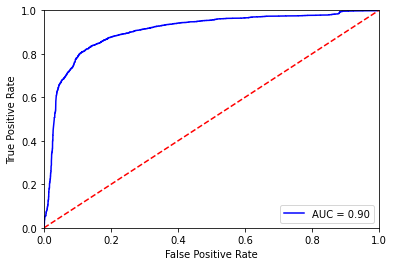

test_auc=0.9045924440886154
test_accuracy=0.847644603458557
confision_mat=[[3254  363]
 [ 659 2432]]


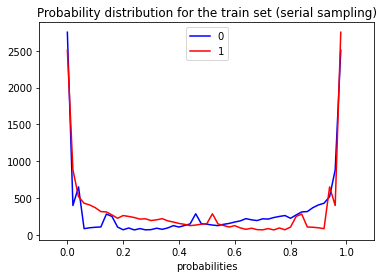

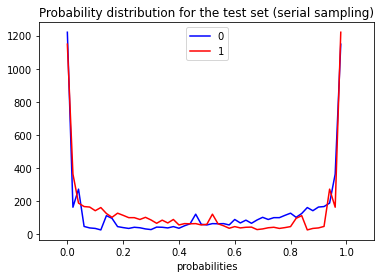

In [19]:
#dividing columns into numeric and string ones
num_columns=['fileSize', 'transferTime', 'queuingTime']
str_columns=['cellName']

#String Indexer and One Hot Encoder implementation
from pyspark.ml.feature import (StringIndexer, OneHotEncoder)
string_indexer=[ StringIndexer(inputCol=x, outputCol=x+'_StringIndexer', handleInvalid='skip') for x in str_columns]
one_hot_encoder=[OneHotEncoder(inputCol=f"{x}_StringIndexer", outputCol=f"{x}_OneHotEncoder") for x in str_columns]

#Vector Assembler implementation
from pyspark.ml.feature import VectorAssembler
assembler_input=[x for x in num_columns]
assembler_input+=[f"{x}_OneHotEncoder" for x in str_columns]
vector_assembler=VectorAssembler(inputCols=assembler_input, outputCol='features')

#splitting selected data on train and test samples (serial_df) 
train, test= serial_df.randomSplit([0.7,0.3],seed=7)

#designation of stages for Pipline
stages=[]
stages+=string_indexer
stages+=one_hot_encoder
stages+=[vector_assembler]

#Pipline model creation
from pyspark.ml import Pipeline
pipeline=Pipeline().setStages(stages)
model=pipeline.fit(train)

#transforming the train sample 
X_train=model.transform(train)
X_train.createOrReplaceTempView("X_train")
data=sqlContext.sql("select distinct(features),label from X_train")

#training Logistic Regression
from pyspark.ml.classification import LogisticRegression
lr=LogisticRegression().fit(data)


#transforming test sample
X_test=model.transform(test)
predicts=lr.transform(X_test)

#getting probabilitis, preidctions and actual labels 
probas=np.array(predicts.select('probability').collect())
lbls=np.array(predicts.select('label').collect())
preds=np.array(predicts.select('prediction').collect())
probas_1=[]
for proba in probas:
    probas_1.append(proba[0][1])
    
#calculating parametrs for ROC-curve plotting   
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(lbls, probas_1)

#calculating auc score
roc_auc = metrics.auc(fpr, tpr)

#ROC-curve plotting   
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#calculating confusion matrix and model accuracy  
conf_mat=metrics.confusion_matrix(lbls,preds)
accuracy=metrics.accuracy_score(lbls,preds)


print('test_auc={}\ntest_accuracy={}\nconfision_mat={}'.format(roc_auc,accuracy,conf_mat))

#probability distributions plotting
predicts_train=lr.transform(X_train)
probas1=np.array(predicts_train.select('probability').collect())
prob_negative1=[]
prob_positive1=[]
for proba1 in probas1:
    prob_negative1.append(proba1[0][0])
    prob_positive1.append(proba1[0][1])
prob_negative1=np.array(prob_negative1)
prob_positive1=np.array(prob_positive1)

probas=np.array(predicts.select('probability').collect())
prob_negative=[]
prob_positive=[]
for proba in probas:
    prob_negative.append(proba[0][0])
    prob_positive.append(proba[0][1])
prob_negative=np.array(prob_negative)
prob_positive=np.array(prob_positive)

neg_train=np.histogram(prob_negative1,50)
pos_train=np.histogram(prob_positive1,50)
neg_test=np.histogram(prob_negative,50)
pos_test=np.histogram(prob_positive,50)

plt.figure()
plt.plot(neg_train[1][:len(neg_train[1])-1],neg_train[0], color='blue', label='0')
plt.plot(pos_train[1][:len(pos_train[1])-1],pos_train[0], color='red', label='1')
plt.xlim([-0.1,1.1])
plt.xlabel('probabilities')
plt.title('Probability distribution for the train set (serial sampling)')
plt.legend()

plt.figure()
plt.plot(neg_test[1][:len(neg_test[1])-1],neg_test[0], color='blue', label='0')
plt.plot(pos_test[1][:len(pos_test[1])-1],pos_test[0], color='red', label='1')
plt.xlim([-0.1,1.1])
plt.xlabel('probabilities')
plt.title('Probability distribution for the test set (serial sampling)')
plt.legend()

`do you have a theory, why the test and training sets give results, that look pretty much similar by eye? especially with the sub-peaks - have you tried different test sets for comparison?) (Honestly, no, we have no ideas regarding this, but we wrote below that more research for this issue are required)`

Full code of the model implementation and evaluation for random sampling:

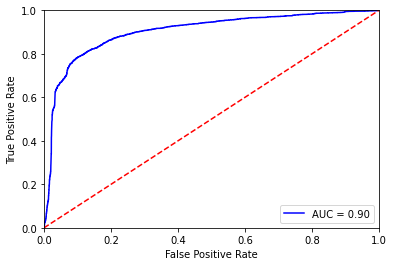

test_auc=0.9022180516790891
test_accuracy=0.8461195361284567
confision_mat=[[3349  311]
 [ 724 2342]]


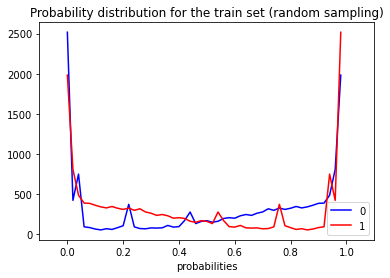

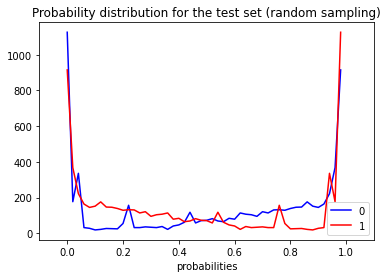

In [20]:
#dividing columns into numeric and string ones
num_columns=['fileSize', 'transferTime', 'queuingTime']
str_columns=['cellName']

#String Indexer and One Hot Encoder implementation
from pyspark.ml.feature import (StringIndexer, OneHotEncoder)
string_indexer=[ StringIndexer(inputCol=x, outputCol=x+'_StringIndexer', handleInvalid='skip') for x in str_columns]
one_hot_encoder=[OneHotEncoder(inputCol=f"{x}_StringIndexer", outputCol=f"{x}_OneHotEncoder") for x in str_columns]

#Vector Assembler implementation
from pyspark.ml.feature import VectorAssembler
assembler_input=[x for x in num_columns]
assembler_input+=[f"{x}_OneHotEncoder" for x in str_columns]
vector_assembler=VectorAssembler(inputCols=assembler_input, outputCol='features')

#splitting selected data on train and test samples (rand_df) 
train, test= rand_df.randomSplit([0.7,0.3],seed=7)

#designation of stages for Pipline
stages=[]
stages+=string_indexer
stages+=one_hot_encoder
stages+=[vector_assembler]

#Pipline model creation
from pyspark.ml import Pipeline
pipeline=Pipeline().setStages(stages)
model=pipeline.fit(train)

#transforming the train sample 
X_train=model.transform(train)
X_train.createOrReplaceTempView("X_train")
data=sqlContext.sql("select distinct(features),label from X_train")

#training Logistic Regression
from pyspark.ml.classification import LogisticRegression
lr=LogisticRegression().fit(data)


#transforming test sample
X_test=model.transform(test)
predicts=lr.transform(X_test)

#getting probabilitis, preidctions and actual labels 
probas=np.array(predicts.select('probability').collect())
lbls=np.array(predicts.select('label').collect())
preds=np.array(predicts.select('prediction').collect())
probas_1=[]
for proba in probas:
    probas_1.append(proba[0][1])
    
#calculating parametrs for ROC-curve plotting   
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(lbls, probas_1)

#calculating auc score
roc_auc = metrics.auc(fpr, tpr)

#ROC-curve plotting   
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#calculating confusion matrix and model accuracy  
conf_mat=metrics.confusion_matrix(lbls,preds)
accuracy=metrics.accuracy_score(lbls,preds)


print('test_auc={}\ntest_accuracy={}\nconfision_mat={}'.format(roc_auc,accuracy,conf_mat))

#probability distributions plotting
predicts_train=lr.transform(X_train)
probas1=np.array(predicts_train.select('probability').collect())
prob_negative1=[]
prob_positive1=[]
for proba1 in probas1:
    prob_negative1.append(proba1[0][0])
    prob_positive1.append(proba1[0][1])
prob_negative1=np.array(prob_negative1)
prob_positive1=np.array(prob_positive1)

probas=np.array(predicts.select('probability').collect())
prob_negative=[]
prob_positive=[]
for proba in probas:
    prob_negative.append(proba[0][0])
    prob_positive.append(proba[0][1])
prob_negative=np.array(prob_negative)
prob_positive=np.array(prob_positive)

neg_train=np.histogram(prob_negative1,50)
pos_train=np.histogram(prob_positive1,50)
neg_test=np.histogram(prob_negative,50)
pos_test=np.histogram(prob_positive,50)

plt.figure()
plt.plot(neg_train[1][:len(neg_train[1])-1],neg_train[0], color='blue', label='0')
plt.plot(pos_train[1][:len(pos_train[1])-1],pos_train[0], color='red', label='1')
plt.xlim([-0.1,1.1])
plt.xlabel('probabilities')
plt.title('Probability distribution for the train set (random sampling)')
plt.legend()

plt.figure()
plt.plot(neg_test[1][:len(neg_test[1])-1],neg_test[0], color='blue', label='0')
plt.plot(pos_test[1][:len(pos_test[1])-1],pos_test[0], color='red', label='1')
plt.xlim([-0.1,1.1])
plt.xlabel('probabilities')
plt.title('Probability distribution for the test set (random sampling)')
plt.legend()

`maybe adding the conusion matrices as well, as you refer to them (probably in a collapsed form?) (They are in the results, look carefully)`

Following observations can be done from the results:
* Scores and ROC-curves look quite similar for both types of selection. We suppose that this is an exceptional case, in more common and complicated situations such behavior is unlikely to be observed. More research are required regarding this issue, at least, it is needed to try diffirent test sets for comparison. However, due to the limited amount of time, we were unable to perform this.

* ROC-curves are a bit wiggled in some places. This fact can be explained by not enough statistics due to the not much amount of input data. However, our case is not critical since most parts are smooth. 

* If you look at the confusion matrices, you can notice that the model with the random sampling is a bit better in predicting `background` instances since TP and FN values are higher than the ones for the model with the serial sampling. While the latter is better in predicting `signal` due to the higher TN and FP values.

One non-obvious and essential issue is whether the chosen value of the model's threshold is appropriate. Let's consider model with the random sampling as an example. As was said before, we selected 0.5 as the threshold value for determing `background` instances, this means that decision boundaries (black dotted lines) split probability disrtibutions on approximately equal parts (look at figures below), therefore, the model will predict `background` and warn users frequently, that sometimes may be inconvenient.

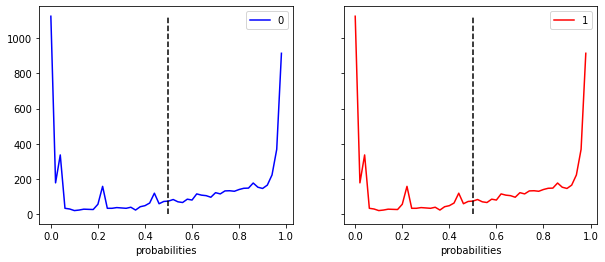

In [21]:
#plot of probability distributions for random sampling with default background threshold
fig, (ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,4))
ax1.plot(neg_test[1][:len(neg_test[1])-1],neg_test[0], color='blue', label='0')
ax1.plot([0.5,0.5],[0,np.max(neg_test[0])],'k--')
ax1.set_xlabel('probabilities')
ax1.legend('0')
ax2.plot(pos_test[1][:len(pos_test[1])-1],neg_test[0], color='red', label='0')
ax2.plot([0.5,0.5],[0,np.max(neg_test[0])],'k--')
ax2.set_xlabel('probabilities')
ax2.legend('1')

To avoid such situations, we can increase the threshold value for `background` determining, for instance, to 0.8, the threshold value for `signal` determining will decrease to 1-0.8=0.2. Decision boundaries will shift from the middle and less part of instances will be predicted as `background` (look at figures below). Of course, due to the `background` threshold rise, accuracy of the model might be reduced, however, with high probability, the model's reliability would be increased. If we get a warning about breakdowns in dCache from the model with stronger requirements to `background` instances, we will be much more sure that something is really going wrong and we should start taking action to figure out what was happened.  


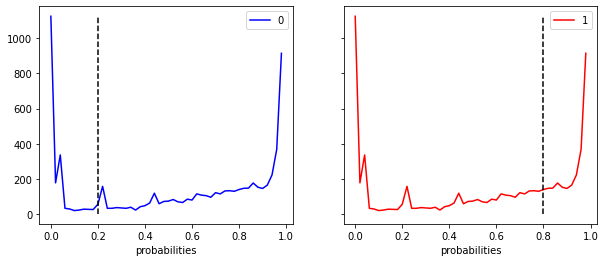

In [22]:
#plot of probability distributions for random sampling with higher background threshold
fig, (ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,4))
ax1.plot(neg_test[1][:len(neg_test[1])-1],neg_test[0], color='blue', label='0')
ax1.plot([0.2,0.2],[0,np.max(neg_test[0])],'k--')
ax1.set_xlabel('probabilities')
ax1.legend('0')
ax2.plot(pos_test[1][:len(pos_test[1])-1],neg_test[0], color='red', label='0')
ax2.plot([0.8,0.8],[0,np.max(neg_test[0])],'k--')
ax2.set_xlabel('probabilities')
ax2.legend('1')

Unfortunately, due to the lack of time, we did not investigate this issue fully. Optimal value for the `background` threshold was not found.

<a name="5"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">5. Conclusions</h1>
Several main conclusions can be drawn from the results.
1. We managed to implement machine learning model able to distinguish signal and background instances with suitable accuracy, approximately 85 % for each sampling way.
2. Testing scores (accuracy, auc) and ROC-curve look very similar for both types of sampling. We are pretty sure that such behavior is not typical in general. In serial sampling, data, with high probability, have a particular sequential structure, that can contribute to the distribution of input data, while in random sampling there is no such problem. Why is in our case no manifestation of described effect - is on more question to investigate.
3. It is needed to investigate in more detail which value of threshold should be chosen for distinguishing signal and background. Optimal value, cutting off the doubtful `background` instances and, at the same time, preserving meaningful ones, should be found.

<a name="6"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">6. Discussion</h1>


In this project, as disscussed we were able to successfully implement a ML algorithm on a Spark framework.

This model can be now used for our task of Anamoly Detection, where our signal represents any error in the DESY system. Now, based on the training, whenever a new request happens, it will consider all the Data for each hour(our selected time frame) that we have selected as Input and based on that classify whether the system is faulty or not. It can then raise an alarm informing dcache engineers of its failure.

We recognise that our model is nowhere close to being perfect.

There were many things which we considered doing but were unable to achieve due to various constrains. Some  include-
* Determining the signal and background data in a better way by performing some statistical tests like Chi Square test etc.
* Doing more rigorous feature selection by performing more traditional Data selection processes.
* Implementing more complex ML algorithm
* Doing the training with more data by selecting data from more dates

We hope that our project has been useful to anyone who is trying to devolop an Anamoly Detection algorithm for the DESY system and serve as stepping stone towards devoloping a more complex and accurate algorithm.

`maybe mention some ideas, how the results could be used - like alarming`



<a name="7"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">7. Acknowledgement</h1>

<a name="7.1"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">7.1. Dipayan Pal</h1>

I would like to express my gratitude towards my supervisors Thomas Hartmann and Christian Voss, who have helped me immensely during the span of my project and helped me learn a lot of new things. I would also like to thank DESY summer student programme organisers for giving me this wonderful oppurtunity and helping me with various problems throughout the entire program. I would also like to thank my partner for this project Elisey Mankove for the continual help and the brainstorming sessions which provided many new insights towards this project.

<a name="8"></a>
<h1 style="background-color:brown;color:white;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;">8. References</h1>

1. Logistic regression: https://spark.apache.org/docs/latest/mllib-linear-methods.html#logistic-regression; https://www.pdfdrive.com/applied-logistic-regression-e172207141.html

2. Apache Spark documentation: https://spark.apache.org/

3. Apache Spark blog by AWS: https://aws.amazon.com/big-data/what-is-spark/

4. <a name="RefML"></a> Machine Learning Definition: https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained

5. ML types: https://www.geeksforgeeks.org/introduction-machine-learning/

6. Apache Spark: https://data-flair.training/blogs/how-apache-spark-works/

7. RDD: https://data-flair.training/blogs/spark-rdd-tutorial/

8. Reinforcement Learing: https://www.javatpoint.com/reinforcement-learning

9. dCache book: https://dcache.org/old/manuals/Book-5.0/

10. MLlib description: https://spark.apache.org/mllib/